In [1]:
import os

# Mostrar carpeta actual
print("Carpeta actual:", os.getcwd())

# Mostrar contenido
print("Contenido de la carpeta actual:", os.listdir())

# Verificar si existe el archivo (ruta relativa o absoluta)
print("Existe el archivo?", os.path.exists("data/raw/covtype.data.gz"))

Carpeta actual: /Users/aroamateogomez/Desktop/BootcampIA/Proyecto7/Grupo1_Modelos_de_Ensemble/notebooks
Contenido de la carpeta actual: ['.gitkeep', '01_EDA.ipynb', '.ipynb_checkpoints']
Existe el archivo? False


In [2]:
import os

print(os.path.exists("../data/raw/covtype.data.gz"))
#os.chdir("../data/raw/covtype.data.gz")
print(os.path.exists("../data/raw/covtype.data.gz"))

True
True


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# setting de pandas opcion para que no aparzca mesajes "Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings..."" 
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

# Configurar estilo de visualizaciones
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

# 1. Cargar datos
df = pd.read_csv("../data/raw/covtype.data.gz") # cargo DataFrame Supplement Sales Data
print("Head Tabla: ")
print(df.head())
print("\n")
print("Info Tabla: ")
print(df.info())
print("\n")
print("Describe Tabla: ")
print(df.describe())
print("\n")

Head Tabla: 
   2596   51   3  258    0   510  221  232  148  6279  1  0.1  0.2  0.3  0.4  \
0  2590   56   2  212   -6   390  220  235  151  6225  1    0    0    0    0   
1  2804  139   9  268   65  3180  234  238  135  6121  1    0    0    0    0   
2  2785  155  18  242  118  3090  238  238  122  6211  1    0    0    0    0   
3  2595   45   2  153   -1   391  220  234  150  6172  1    0    0    0    0   
4  2579  132   6  300  -15    67  230  237  140  6031  1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  0.10  0.11  0.12  0.13  0.14  0.15  0.16  0.17  \
0    0    0    0    0    0     0     0     0     0     0     0     0     0   
1    0    0    0    0    0     0     0     0     0     0     1     0     0   
2    0    0    0    0    0     0     0     0     0     0     0     0     0   
3    0    0    0    0    0     0     0     0     0     0     0     0     0   
4    0    0    0    0    0     0     0     0     0     0     0     0     0   

   0.18  0.19  0.20  0.21  0.22  0.23

✅ Filas: 581011, Columnas: 55

Tipos de datos:

int64    55
Name: count, dtype: int64 

Valores nulos por columna:

0 valores nulos en total

✅ Columnas renombradas correctamente

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2590      56      2                               212   
1       2804     139      9                               268   
2       2785     155     18                               242   
3       2595      45      2                               153   
4       2579     132      6                               300   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              -6                              390   
1                              65                             3180   
2                             118                             3090   
3                              -1                              391   
4                             -15                               67   

   Hills

/var/folders/gt/tfdp3g0n2430nwvd1ftk_4w80000gn/T/ipykernel_44213/1784104301.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cover_Type", data=df, palette="viridis")


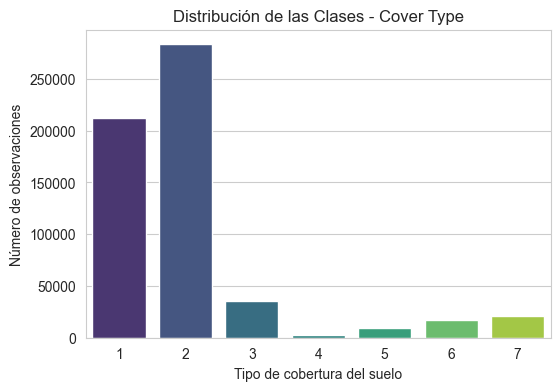

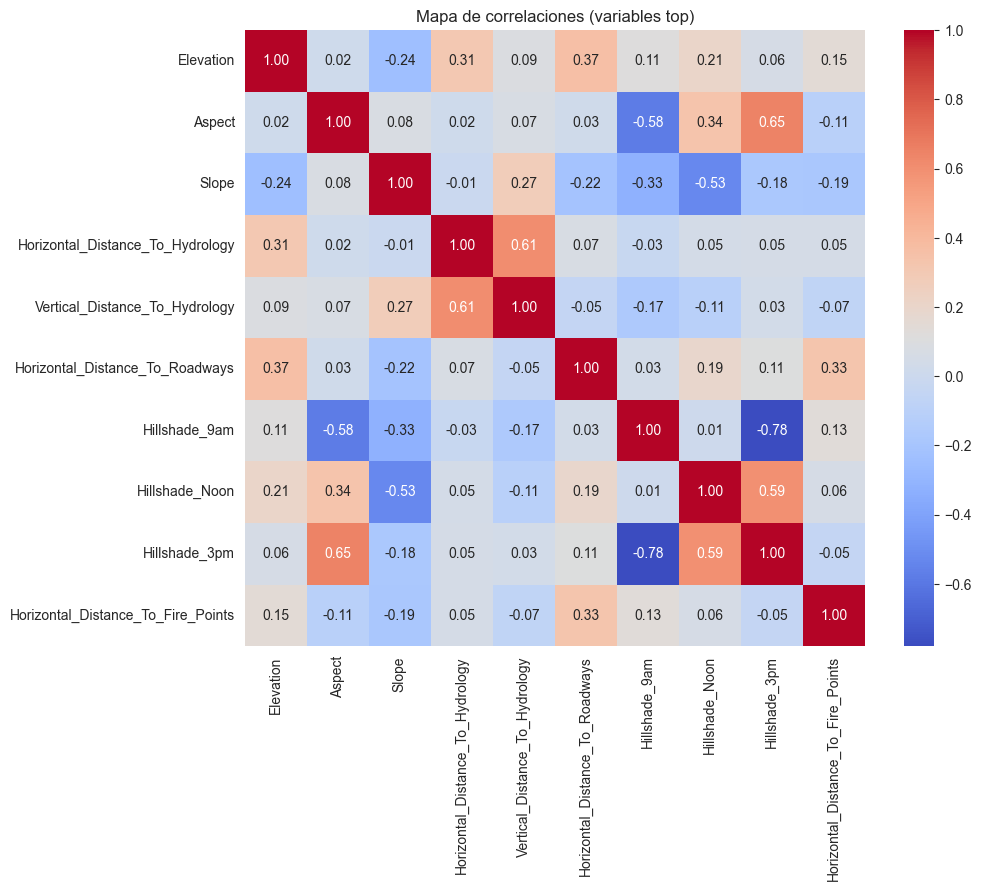

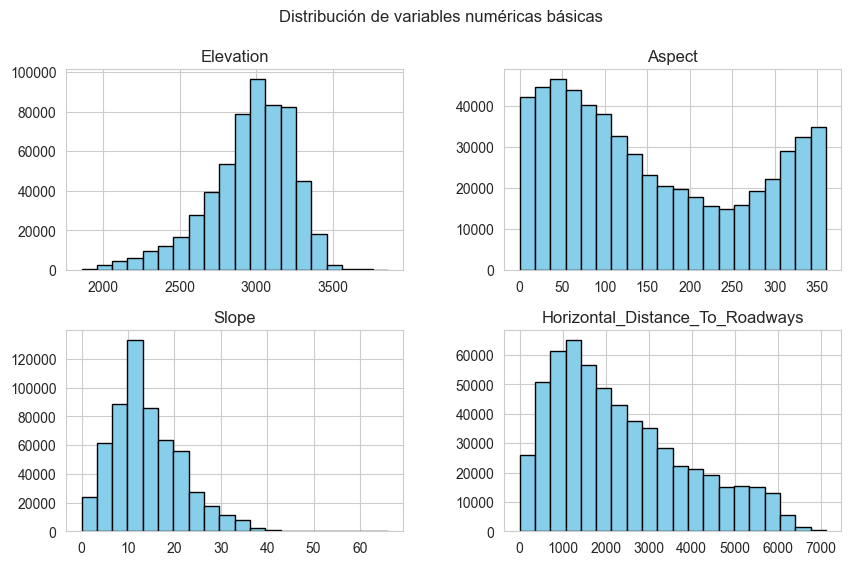

/var/folders/gt/tfdp3g0n2430nwvd1ftk_4w80000gn/T/ipykernel_44213/1784104301.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cover_Type", y="Elevation", data=df, palette="Set2")


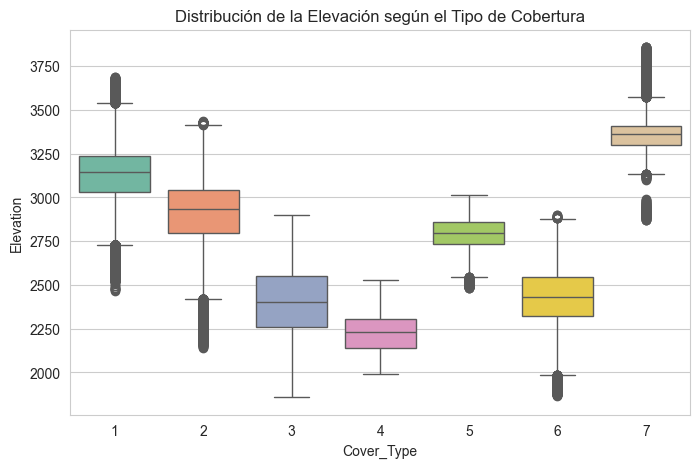


🔍 Correlación con la variable objetivo (Top 10):

Cover_Type           1.000000
Wilderness_Area_3    0.323202
Soil_Type_9          0.243878
Soil_Type_37         0.160171
Soil_Type_38         0.155669
Slope                0.148292
Soil_Type_39         0.128352
Soil_Type_1          0.118136
Soil_Type_5          0.112959
Soil_Type_3          0.099673
dtype: float64


In [4]:
# ============================================
# 📊 Exploratory Data Analysis - Covertype Data
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
pd.set_option("display.max_columns", 20)

# El dataset ya está cargado en df
print(f"✅ Filas: {df.shape[0]}, Columnas: {df.shape[1]}\n")

# ============================================
# 1️⃣ Ver estructura básica
# ============================================

print("Tipos de datos:\n")
print(df.dtypes.value_counts(), "\n")

print("Valores nulos por columna:\n")
print(df.isnull().sum().sum(), "valores nulos en total\n")

# ============================================
# 2️⃣ Renombrar columnas para mayor claridad
# ============================================

# Según la documentación, hay 54 features + 1 target (Cover_Type)
column_names = [
    "Elevation", "Aspect", "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]

# Añadimos las variables dummy (40 para wilderness + 4 para soil)
dummy_columns = [f"Wilderness_Area_{i}" for i in range(4)] + [f"Soil_Type_{i}" for i in range(40)]
column_names = column_names + dummy_columns + ["Cover_Type"]

df.columns = column_names

print("✅ Columnas renombradas correctamente\n")
print(df.head())

# ============================================
# 3️⃣ Estadísticas generales
# ============================================

print("\n📈 Estadísticas generales:\n")
print(df.describe().T.head(10))

# ============================================
# 4️⃣ Distribución de la variable objetivo
# ============================================

plt.figure(figsize=(6,4))
sns.countplot(x="Cover_Type", data=df, palette="viridis")
plt.title("Distribución de las Clases - Cover Type")
plt.xlabel("Tipo de cobertura del suelo")
plt.ylabel("Número de observaciones")
plt.show()

# ============================================
# 5️⃣ Correlación entre variables numéricas
# ============================================

plt.figure(figsize=(10, 8))
corr = df.iloc[:, :10].corr()  # solo las primeras variables continuas
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlaciones (variables top)")
plt.show()

# ============================================
# 6️⃣ Distribuciones individuales
# ============================================

cols = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Roadways"]
df[cols].hist(bins=20, figsize=(10,6), color="skyblue", edgecolor="black")
plt.suptitle("Distribución de variables numéricas básicas")
plt.show()

# ============================================
# 7️⃣ Relación Elevation vs Cover_Type
# ============================================

plt.figure(figsize=(8,5))
sns.boxplot(x="Cover_Type", y="Elevation", data=df, palette="Set2")
plt.title("Distribución de la Elevación según el Tipo de Cobertura")
plt.show()

# ============================================
# 8️⃣ Correlación con el target (numérica)
# ============================================

corr_target = df.corrwith(df["Cover_Type"]).sort_values(ascending=False)
print("\n🔍 Correlación con la variable objetivo (Top 10):\n")
print(corr_target.head(10))
